In [50]:
import os

import utils_cnh
import read_model
import inference
import ocr_cnh

from PIL import Image
import matplotlib.pyplot as plt
import json

In [83]:
def dict_cnh(imgs):
    cpf = ocr_cnh.cpf_(imgs[0])
    nasc = ocr_cnh.nasc_(imgs[1])
    cnh = ocr_cnh.cnh_(imgs[2])
    names = ['CPF', 'Nascimento', 'CNH']

    data = [cpf.strip(), nasc.strip(), cnh.strip()]

    CNH = {}
    for i in range(len(names)):
        CNH[names[i]] = data[i]
    
    return(CNH)

### Iniciando o modelo

In [4]:
detection_graph = read_model.model()

### Lendo a imagem e fazendo a inferência

In [7]:
path = './cnhs/cnh2.jpg'
imgs = inference.crop(path, detection_graph)
image = Image.open(path)

### Resultado do modelo

##### Foto original

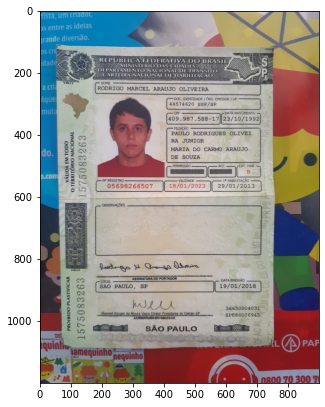

In [15]:
plt.figure(figsize=(5,15))
plt.imshow(image)

##### Campos detectados pelo modelo

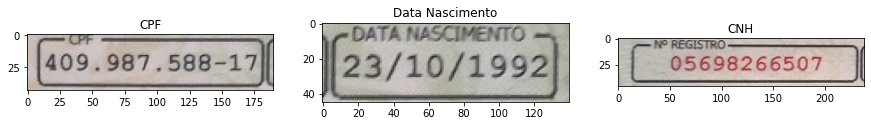

In [45]:
f, ax = plt.subplots(1,3,figsize=(15,15))

ax[0].set_title('CPF')
ax[0].imshow(imgs[0])
ax[1].set_title('Data Nascimento')
ax[1].imshow(imgs[1])
ax[2].set_title('CNH')
ax[2].imshow(imgs[2])

### OCR dos campos e resultado

In [84]:
result = dict_cnh(imgs)
print(result)

{'CPF': '40998758817', 'Nascimento': '23/10/1992', 'CNH': '05698266507'}
